Objectifs :
- Etudier pas à pas les étapes de l'algo de jour

Buts possibles :
- Tenter de comprendre l'impact du choix du nombre d'itérations par entrainement et du nombre d'iterations par jour
- Voir si tous les gestes sont optimisés uniformement

Ce qui est fait dans le notebook pour le moment : A partir d'un fichier log (Je n'ai que 2 fichiers pour le moment malheureusement...), pour toute les phases de jour, pour chaque entrainement, j'ai compté le nombre de fois que cet entrainement amenait une amélioration du score du chant

Le nombre de fois que le 1er entrainement de la journée améliore, que le 2e de la journée améliore, etc... et celà pour chaque journée

But : Voir si après un certain nombre d'itération on atteignait un seuil, càd que l'oiseau n'améliore plus aucun chant

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import pandas
import pickle
import re
import sys

sys.path.append('../model/')
from song_model import SongModel

fig_width = 16 # full screen: 16 / half screen: 10
fig_height = 5

# Day statistic from a songlog

train_per_day: 200
[17. 15. 16. 18. 13. 12. 11. 15. 14. 16. 17. 18. 14. 12. 14. 14. 10. 18.
 15. 16.  9. 12.  7. 18. 13. 10. 15. 14. 12.  8. 11.  9.  7. 11.  9. 14.
  9. 10.  7.  7. 11. 14. 12. 13. 12.  9. 11. 11.  8. 12. 11. 10.  7.  4.
  9.  9.  6. 11. 10. 10. 11.  8. 11.  7. 10. 14. 10.  6. 13. 11.  5.  7.
  7.  8. 11. 11. 14.  9.  9.  6.  7.  8.  8.  7.  6.  8.  4.  5.  7.  7.
  9.  8.  7.  7.  9. 15. 11.  6.  8. 10. 17.  6.  6.  8.  9. 11.  3.  8.
  7. 12.  7.  8.  6.  7.  7.  8.  7.  8.  5. 10.  9. 12. 11. 14.  9.  6.
  8.  9.  7.  7.  7. 10.  9.  9.  5.  5. 10.  7. 13.  3.  7.  8.  7.  9.
  7.  9.  7.  4.  8.  9.  7.  9.  9. 12.  8. 12.  4.  7.  6.  9.  8.  7.
  9. 10.  5.  7.  9.  4.  7.  3.  6.  7.  4.  7.  6.  7.  7.  3.  6.  5.
  8.  9.  6.  7.  7. 12.  6.  6.  7.  6.  5.  4.  9.  6.  6.  4.  5.  4.
  7.  4.]


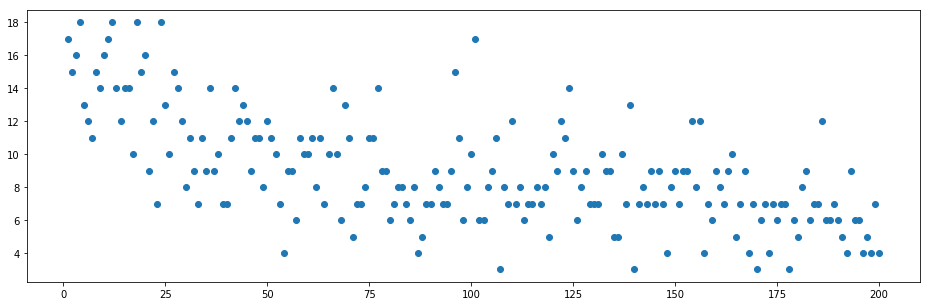

In [26]:
# 2 song log available from the cluster
file_path = '../model/res/seed5+grid_div_th+500_diversity_th.e583083'
# file_path = '../model/res/seed2+default_dev+dev_test.e583124'

with open(file_path, 'r') as f:
    line = f.readline()
    
    while not line.startswith(" 'train_per_day': ") and line != '':
        line = f.readline()
    m = re.match(r" 'train_per_day': (\d+)", line)
    train_per_day = int(m.group(1))
    res = np.zeros(train_per_day)
    
    while line != '':
        if line.startswith('INFO:root:*'):
            m = re.match(r'.*Day (\d+)', line)
            i_day = m.group(1)
        if line.startswith('INFO:DayOptim:'):
            m = re.match(r'^INFO:DayOptim:(\d+)/'+str(train_per_day)+'.*score (\d+\.\d+)', line)
            i = int(m.group(1))
            pre_score = float(m.group(2))
            line = f.readline()
            m = re.match(r'.* (\d+\.\d+)', line)
            new_score = float(m.group(1))
            if new_score < pre_score:
                res[i-1] +=1
        
        line = f.readline()

print("train_per_day:", train_per_day)
print(res)

plt.figure(figsize=(fig_width, fig_height))
# plt.bar(np.arange(1, train_per_day+1),res)
plt.plot(np.arange(1, train_per_day+1),res, 'o')
plt.show()

# Test Regex

In [ ]:
line = " 'train_per_day': 600,"
m = re.match(r" 'train_per_day': (\d+)", line)
print(m.group(0))
print(m.group(1))

In [ ]:
line = 'INFO:root:*	*	*	Day 17 of 30	*	*	*'
m = re.match(r'.*Day (\d+)', line)
print(m.group(0))
print(m.group(1))

In [ ]:
line = 'INFO:DayOptim:129/200: fit gesture 1 of song 2 (length 19014, score 12.991580499303726)'
m = re.match(r'^INFO:DayOptim:(\d*)/200.*score (\d+\.\d+)', line)
print(m.group(0))
print(m.group(1))
print(m.group(2))


In [ ]:
line = 'INFO:DayOptim:new score 16.067209981065453'
m = re.match(r'.* (\d+\.\d+)', line)
print(m.group(0))
print(m.group(1))

# Day statistics from simulation data

In [22]:
# path of the folder with the results
path = '../model/res/'

# -- Cluster simulations --
path += 'dlm_nlm_equilibrium_180807_173045/'

# -- All parameters are defined at the same time --
param_name = "seed0+dlm_nlm_equilibrium+200_trainings+50_iter+10_night_conc+100_replay"
path += param_name

with open(join(path, 'conf.json'), 'r') as f:
    run_param = json.load(f)
with open(join(path, 'data.pkl'), 'rb') as f:
    songlog = pickle.load(f)
    
day_data = [item[1] for item in songlog if item[0] == 'day']
dd = pandas.DataFrame(day_data)

In [23]:
dd['improvement_cpt'].sum()

array([14., 17.,  7.,  9., 13.,  8., 12.,  9., 12.,  5., 10., 13., 10.,
       11.,  9., 10.,  7.,  8.,  8., 12.,  9.,  8.,  8., 12.,  7.,  8.,
        7., 10.,  8., 10.,  9.,  5.,  6.,  3., 13.,  7.,  8.,  7., 10.,
        7.,  7.,  7.,  9.,  4.,  9.,  9.,  5.,  7.,  3.,  7.,  4.,  7.,
        1.,  5.,  7.,  5.,  7.,  8.,  9., 11.,  6.,  4.,  6.,  6.,  4.,
        7.,  6.,  6., 10.,  7.,  5.,  9., 10.,  6.,  6., 10.,  6.,  8.,
        3.,  8.,  6.,  8.,  8.,  7.,  7.,  9.,  6.,  6.,  8.,  6.,  6.,
        5.,  6.,  5.,  7., 11.,  5.,  5.,  8.,  6.,  7.,  5.,  6.,  9.,
        6., 13.,  5.,  7.,  5.,  4.,  7.,  7.,  4.,  9.,  5.,  5.,  4.,
        7.,  6.,  6.,  7.,  8.,  5.,  4.,  9.,  8.,  2.,  4.,  6.,  5.,
       10., 10.,  5.,  4.,  7.,  5.,  5.,  5.,  3.,  1.,  4.,  1.,  5.,
        7.,  1.,  8.,  4.,  5.,  3.,  5.,  6.,  7.,  4.,  4.,  5.,  9.,
        3.,  5.,  3.,  8.,  7., 10.,  5.,  4.,  3.,  3.,  5.,  3.,  4.,
        4., 10.,  3.,  8.,  5.,  5.,  8.,  3.,  6.,  2.,  5.,  5

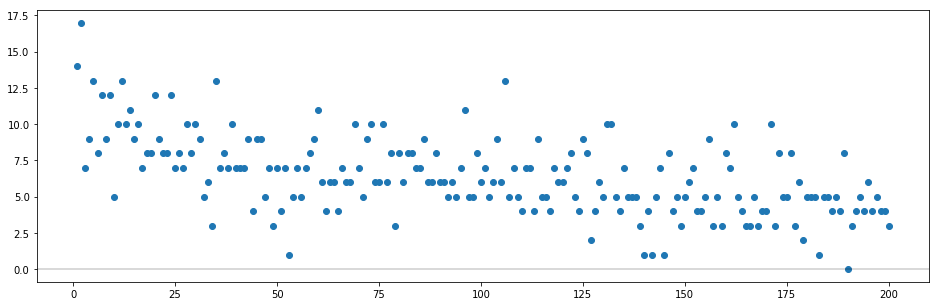

In [24]:
plt.figure(figsize=(fig_width, fig_height))
x = np.arange(1, run_param['train_per_day']+1)
y = dd['improvement_cpt'].sum()
plt.scatter(x, y)
plt.axhline(y=0, color='k', alpha=0.2)
plt.show()